# Data visualization


Importing libraries

In [75]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

In [66]:
file_path = 'name.csv'

In [67]:
with open(file_path) as f:
  data = f.read()

In [68]:
data = data.replace('"', '')


Saving data in a Pandas dataframe

In [69]:
data = StringIO(data)
df = pd.read_csv(data) #1 punto Leer los datos del archivo CSV y guardarlos en un dataframe de Pandas.

In [70]:
df

,Entidad,Sector,Fecha,Validos,Rechazados
0,Entidad 16,Sector 1,2017-08-26,902980,254421
1,Entidad 26,Sector 3,2016-11-25,942619,129983
2,Entidad 47,Sector 4,2017-06-07,5218259,1461433
3,Entidad 13,Sector 1,2016-06-19,1095685,504031
4,Entidad 15,Sector 1,2016-06-16,8237789,772612
...,...,...,...,...,...
487,Entidad 34,Sector 2,2015-05-20,6679559,1742933
488,Entidad 11,Sector 5,2016-07-13,5915911,2458580
489,Entidad 38,Sector 4,2016-10-09,4835951,1219582
490,Entidad 43,Sector 5,2017-12-12,8018571,727868


Creation of reported column

In [71]:
df['Reportados']=df['Validos']+df['Rechazados'] #Creo la columna Reportados que es la suma de los valores de Validos + Rechazados


In [72]:
df

,Entidad,Sector,Fecha,Validos,Rechazados,Reportados
0,Entidad 16,Sector 1,2017-08-26,902980,254421,1157401
1,Entidad 26,Sector 3,2016-11-25,942619,129983,1072602
2,Entidad 47,Sector 4,2017-06-07,5218259,1461433,6679692
3,Entidad 13,Sector 1,2016-06-19,1095685,504031,1599716
4,Entidad 15,Sector 1,2016-06-16,8237789,772612,9010401
...,...,...,...,...,...,...
487,Entidad 34,Sector 2,2015-05-20,6679559,1742933,8422492
488,Entidad 11,Sector 5,2016-07-13,5915911,2458580,8374491
489,Entidad 38,Sector 4,2016-10-09,4835951,1219582,6055533
490,Entidad 43,Sector 5,2017-12-12,8018571,727868,8746439


Registers reported

In [73]:
data_reg_report= df[['Sector','Reportados']] #Los registros reportados por sector

In [74]:
data_reg_report.head()


,Sector,Reportados
0,Sector 1,1157401
1,Sector 3,1072602
2,Sector 4,6679692
3,Sector 1,1599716
4,Sector 1,9010401


In [77]:
data_reports=df.groupby('Sector')['Reportados'].sum()

In [78]:
data_reports.head()

Sector
Sector 1    523961314
Sector 2    475700144
Sector 3    473417528
Sector 4    457915394
Sector 5    455379884
Name: Reportados, dtype: int64

Chart of the reporter register by sector using pie chart

(-1.099998401635646,
 1.0999999238874116,
 -1.0999945225725483,
 1.0999949881170852)

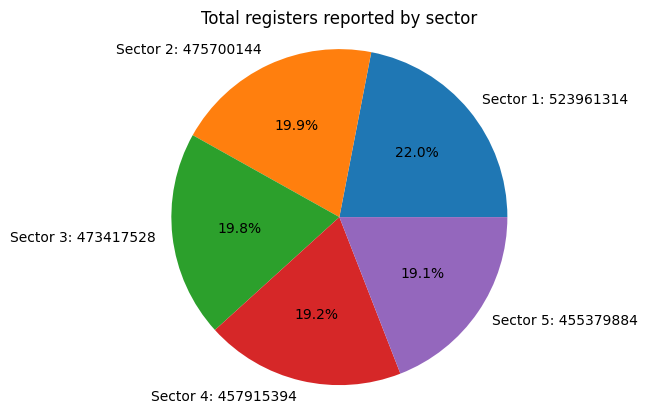

In [86]:
#2 punto grafico del total de registros reportados por sector
plt.title('Total registers reported by sector')
plt.pie(data_reports, labels=[f"{Sector}: {Reports}" for Sector, Reports in data_reports.items()], autopct='%1.1f%%')
plt.axis('equal')



Sector by valid records

In [87]:
data_valid=df.groupby('Sector')['Validos'].sum()

In [88]:
data_valid

Sector
Sector 1    430268799
Sector 2    406196470
Sector 3    395561387
Sector 4    389114420
Sector 5    373551320
Name: Validos, dtype: int64

Graph of the total number of valid registrations by sector

(-1.0999983196875391,
 1.099999919985121,
 -1.099994393355106,
 1.0999934182358202)

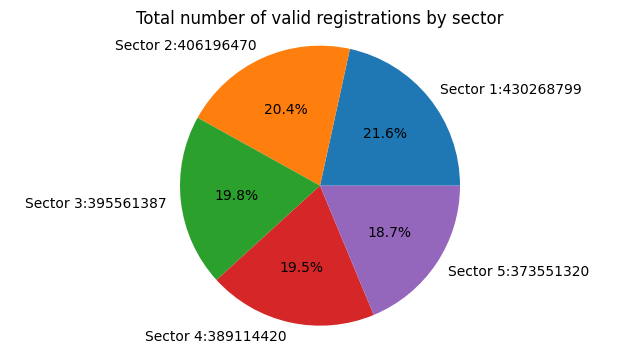

In [90]:
#3 punto grafico del total de registros validos por sector
plt.figure(figsize=(8,4))
plt.pie(data_valid,labels=[f"{Sector}:{Valid}" for Sector, Valid in data_valid.items()], autopct='%1.1f%%')
plt.title('Total number of valid registrations by sector')
plt.axis('equal')

Rejected registrations by sector

In [91]:
data_rejected=df.groupby('Sector')['Rechazados'].sum()

In [92]:
data_rejected

Sector
Sector 1    93692515
Sector 2    69503674
Sector 3    77856141
Sector 4    68800974
Sector 5    81828564
Name: Rechazados, dtype: int64

(-1.0999987927896404,
 1.0999999425137923,
 -1.099996377542074,
 1.0999995282045254)

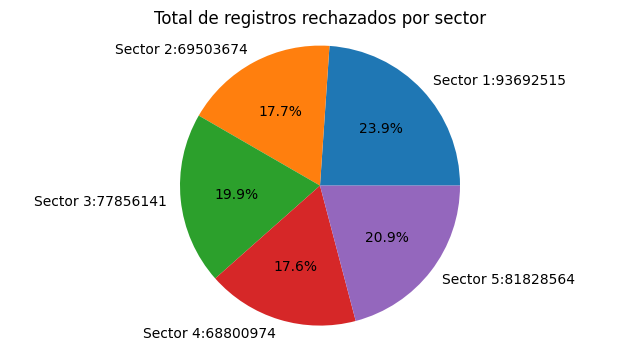

In [94]:
#4 punto grafico del total de registros rechazados por sector
plt.figure(figsize=(8,4))
plt.pie(data_rejected,labels=[f"{Sector}:{Rejecteds}" for Sector, Rejecteds in data_rejected.items()], autopct='%1.1f%%')
plt.title('Total de registros rechazados por sector')
plt.axis('equal')

Rejected records by entity

In [95]:
data_entity_rejecteds= df.groupby('Entidad')['Rechazados'].sum() #5 Agrupamos por entidad los registros rechazados


In [96]:
data_entity_rejecteds

Entidad
Entidad 1      2391010
Entidad 10     4873472
Entidad 11     8141720
Entidad 12     9279346
Entidad 13    16351259
Entidad 14     6237053
Entidad 15    11135353
Entidad 16     8447570
Entidad 17     4449545
Entidad 18    11301647
Entidad 19     6621637
Entidad 2      7992934
Entidad 20     4155306
Entidad 21    12341541
Entidad 22     3220531
Entidad 23     7150274
Entidad 24     5953677
Entidad 25     5650865
Entidad 26     3935450
Entidad 27     6787462
Entidad 28    10830566
Entidad 29     8402845
Entidad 3      4267944
Entidad 30     7513947
Entidad 31     6267469
Entidad 32     6996600
Entidad 33     2291331
Entidad 34    10295325
Entidad 35     5008243
Entidad 36     9790871
Entidad 37     6953239
Entidad 38    11839107
Entidad 39     9024924
Entidad 4      2672887
Entidad 40     6527396
Entidad 41     6518623
Entidad 42     5141666
Entidad 43    10153568
Entidad 44    13006187
Entidad 45     4818969
Entidad 46     8565074
Entidad 47    17045277
Entidad 48    13809898
Ent

In [98]:
entity_more_rejected=data_entity_rejecteds.idxmax()
quantity_rejected=data_entity_rejecteds.max()

Entity that had the most rejected registrations.

In [99]:
#5 punto Imprimir en salida estándar la entidad que tuvo más registros rechazados.
print(f"La entidad con mas rechazados es: '{entity_more_rejected}' \ncon un total de rechazados de '{quantity_rejected}'")

La entidad con mas rechazados es: 'Entidad 47' 
con un total de rechazados de '17045277'
